# Linear Regression


In [48]:
import pandas as pd

data = pd.read_csv("/content/BostonHousing.csv")
data.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [49]:
data.tail()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0,0.573,6.030,80.8,2.5050,1,273,21.0,396.90,7.88,11.9


In [50]:
data.shape

(506, 14)

In [51]:
data.describe().T #.T for transpose

,count,mean,std,min,25%,50%,75%,max
crim,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677083,88.9762
zn,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
indus,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
chas,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
nox,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
rm,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
age,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
dis,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
rad,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
tax,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


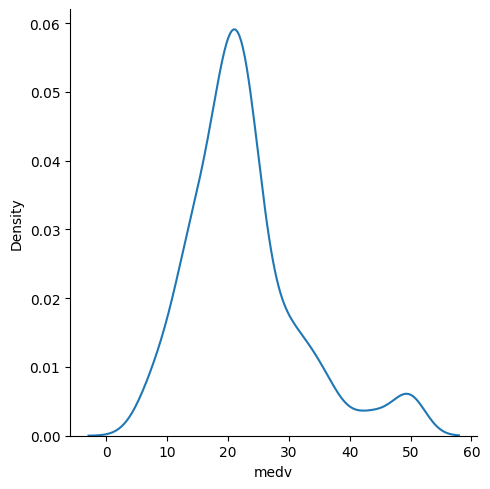

In [52]:
import seaborn as sns
sns.displot(data['medv'], kind='kde') # medv is the target variable

<Axes: xlabel='dis', ylabel='Count'>

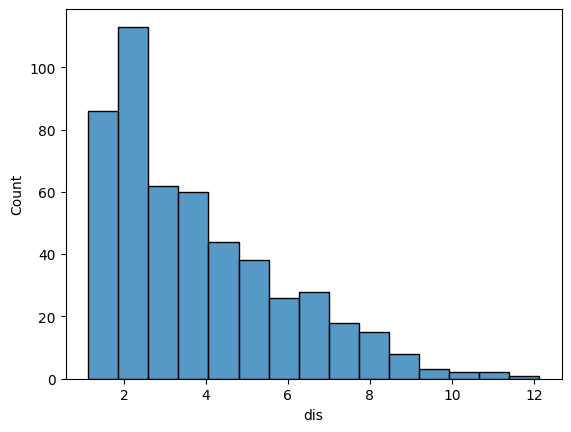

In [53]:
sns.histplot(data['dis'])

In [54]:
data = data.drop_duplicates()

In [55]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [56]:
data.corr()['medv']
# checking the correlation of the columns with respect to 'medv' column

,medv
crim,-0.388305
zn,0.360445
indus,-0.483725
chas,0.175260
nox,-0.427321
rm,0.695360
age,-0.376955
dis,0.249929
rad,-0.381626
tax,-0.468536


# Preparing data


In [57]:
# split the data into features and target
X = pd.DataFrame(data[['lstat', 'rm']])
Y = pd.DataFrame(data['medv']) #target
X

,lstat,rm
0,4.98,6.575
1,9.14,6.421
2,4.03,7.185
3,2.94,6.998
4,5.33,7.147
...,...,...
501,9.67,6.593
502,9.08,6.120
503,5.64,6.976
504,6.48,6.794


In [58]:
print(X.size, Y.size)

1012 506


In [59]:
# Split the data into train test split
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=23)

In [60]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(404, 2)
(102, 2)
(404, 1)
(102, 1)


In [61]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, Y_train)

LinearRegression()

In [62]:
print(regressor.intercept_)  # y = mx+c intercept is c

[0.37428615]


In [63]:
print(regressor.coef_) # y=mx+c coef is m

[[-0.66721079  4.88331552]]


In [64]:
Y_pred = regressor.predict(X_test)

In [65]:
Y_pred = pd.DataFrame(Y_pred, columns=['Predicted'])
Y_pred

,Predicted
0,23.026344
1,26.280023
2,23.824363
3,18.094849
4,39.438477
...,...
97,23.910143
98,26.180794
99,26.950554
100,17.337472


In [66]:
Y_test

,medv
176,23.2
311,22.1
94,20.6
139,17.8
232,41.7
...,...
352,18.6
91,22.0
320,23.8
376,13.9


In [67]:
df_pred = pd.DataFrame(columns=['Actual','Predict'])
df_pred['Actual'] = Y_test.reset_index()['medv']
df_pred['Predict'] = Y_pred.reset_index()['Predicted']
df_pred

,Actual,Predict
0,23.2,23.026344
1,22.1,26.280023
2,20.6,23.824363
3,17.8,18.094849
4,41.7,39.438477
...,...,...
97,18.6,23.910143
98,22.0,26.180794
99,23.8,26.950554
100,13.9,17.337472


In [68]:
df_pred['Error'] = df_pred['Actual'] - df_pred['Predict']
df_pred

,Actual,Predict,Error
0,23.2,23.026344,0.173656
1,22.1,26.280023,-4.180023
2,20.6,23.824363,-3.224363
3,17.8,18.094849,-0.294849
4,41.7,39.438477,2.261523
...,...,...,...
97,18.6,23.910143,-5.310143
98,22.0,26.180794,-4.180794
99,23.8,26.950554,-3.150554
100,13.9,17.337472,-3.437472


In [69]:
from sklearn import metrics
import numpy as np

print('Mean Absolute Error : ', metrics.mean_absolute_error(Y_test, Y_pred))
print('Mean Squared Error : ', metrics.mean_squared_error(Y_test, Y_pred))
print('Root Mean Squared Error : ', np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)))
print('Mean Absolute Percentage Error : ', metrics.mean_absolute_percentage_error(Y_test, Y_pred)*100)

Mean Absolute Error :  4.300122669036365
Mean Squared Error :  30.726065211573893
Root Mean Squared Error :  5.5431097058937855
Mean Absolute Percentage Error :  21.704961612787084


In [70]:
from sklearn.metrics import r2_score
r2_score(Y_test,Y_pred)

0.6433023932639312

#Multilinear Regression

In [71]:
dataset = pd.read_csv("/content/BostonHousing.csv")
dataset

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [72]:
X = pd.DataFrame(dataset.iloc[:,:-1])
Y = pd.DataFrame(dataset.iloc[:,-1])

In [73]:
print(X.size, Y.size)

6578 506


In [74]:
dataset.corr()['medv']

,medv
crim,-0.388305
zn,0.360445
indus,-0.483725
chas,0.175260
nox,-0.427321
rm,0.695360
age,-0.376955
dis,0.249929
rad,-0.381626
tax,-0.468536


In [75]:
# Split the data into train test split
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=23)

In [76]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(404, 13)
(102, 13)
(404, 1)
(102, 1)


In [77]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, Y_train)

LinearRegression()

In [78]:
print(regressor.intercept_)  # y = mx+c intercept is c

[37.01314335]


In [79]:
print(regressor.coef_) # y=mx+c coef is m

[[-1.02096701e-01  4.65119270e-02  1.49684450e-02  3.30336317e+00
  -1.97258917e+01  3.64434550e+00  4.96665387e-03 -1.51069734e+00
   2.76148399e-01 -9.88072653e-03 -8.90677867e-01  9.62981073e-03
  -5.58956664e-01]]


In [80]:
Y_pred = regressor.predict(X_test)

In [84]:
v = pd.DataFrame(regressor.coef_, index = ['co-efficient']).transpose()
w = pd.DataFrame(X.columns, columns=['Attribute'])
coeff_df = pd.concat([w,v],axis=1,join='inner')
coeff_df

,Attribute,co-efficient
0,crim,-0.102097
1,zn,0.046512
2,indus,0.014968
3,chas,3.303363
4,nox,-19.725892
5,rm,3.644345
6,age,0.004967
7,dis,-1.510697
8,rad,0.276148
9,tax,-0.009881


In [81]:
Y_pred = pd.DataFrame(Y_pred, columns=['Predicted'])
Y_pred

,Predicted
0,25.615873
1,27.125867
2,27.208853
3,16.766034
4,38.008115
...,...
97,17.237610
98,27.688854
99,25.086056
100,17.711016


In [82]:
df_pred = pd.DataFrame(columns=['Actual','Predict'])
df_pred['Actual'] = Y_test.reset_index()['medv']
df_pred['Predict'] = Y_pred.reset_index()['Predicted']
df_pred

,Actual,Predict
0,23.2,25.615873
1,22.1,27.125867
2,20.6,27.208853
3,17.8,16.766034
4,41.7,38.008115
...,...,...
97,18.6,17.237610
98,22.0,27.688854
99,23.8,25.086056
100,13.9,17.711016


In [85]:
df_pred['Error'] = df_pred['Actual'] - df_pred['Predict']
df_pred

,Actual,Predict,Error
0,23.2,25.615873,-2.415873
1,22.1,27.125867,-5.025867
2,20.6,27.208853,-6.608853
3,17.8,16.766034,1.033966
4,41.7,38.008115,3.691885
...,...,...,...
97,18.6,17.237610,1.362390
98,22.0,27.688854,-5.688854
99,23.8,25.086056,-1.286056
100,13.9,17.711016,-3.811016


In [86]:
from sklearn import metrics
import numpy as np

print('Mean Absolute Error : ', metrics.mean_absolute_error(Y_test, Y_pred))
print('Mean Squared Error : ', metrics.mean_squared_error(Y_test, Y_pred))
print('Root Mean Squared Error : ', np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)))
print('Mean Absolute Percentage Error : ', metrics.mean_absolute_percentage_error(Y_test, Y_pred)*100)

Mean Absolute Error :  3.6689886710784756
Mean Squared Error :  21.953471731537093
Root Mean Squared Error :  4.6854532044976285
Mean Absolute Percentage Error :  17.867332965760014


In [87]:
from sklearn.metrics import r2_score
r2_score(Y_test,Y_pred)

0.7451430642919572